## 特征脸

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
faces = fetch_lfw_people()

In [4]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
faces.data.shape

(13233, 2914)

In [6]:
faces.images.shape

(13233, 62, 47)

In [7]:
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]

In [8]:
# 取前36张图片进行绘制
example_faces = X[:36,:]
example_faces.shape

(36, 2914)

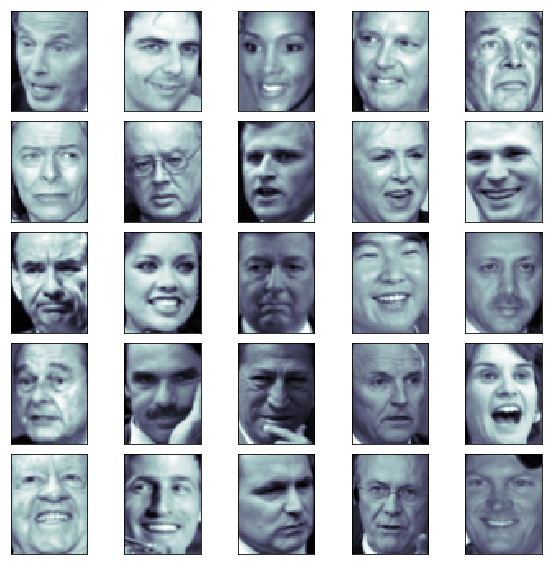

In [9]:
def plot_digits(data):
    fig, axes = plt.subplots(5, 5, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(62, 47),
                  cmap='bone')

    plt.show()
    
plot_digits(example_faces)

In [10]:
faces.target_names
faces.target_names.shape

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

(5749,)

### 提取特征脸

In [11]:
%%time
from sklearn.decomposition import PCA
pca = PCA(svd_solver="randomized")
pca.fit(X)

CPU times: user 55.3 s, sys: 1.94 s, total: 57.3 s
Wall time: 31.4 s


In [12]:
pca.components_.shape

(2914, 2914)

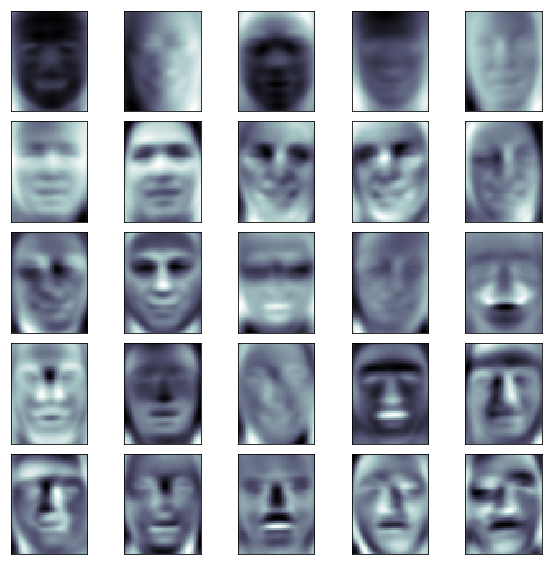

In [13]:
# 特征脸 把每一个主成分当成一个新样本 （找出数据的共性）
example_eigen_faces = pca.components_[:36,:]
plot_digits(example_eigen_faces)

#### 从 fetch_lfw_people 中 只提取每个人有>=60个样本的人脸数据

In [14]:
faces2 = fetch_lfw_people(min_faces_per_person=60)

In [15]:
faces2.target_names.shape

(8,)

In [16]:
faces2.data.shape

(1348, 2914)